In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import csv
import seaborn as sns
import string

In [64]:
#Defining function to clean up dups from key field 'Make'
def func(x):
    punc = '''-!()[]{};:'",<>./?@#$%^&*~'''
    for ele in str(x):
        if ele in punc:
            x = str(x).replace(ele, "")
    x = str(x).title()
    x = x.replace(" Inc","")
    x = x.replace(" Corp","")
    x = x.replace(" Co","")
    x = x.replace("Airborne Windsports","Airborne_Windsports")
    x = x.replace("Airborne Windsport","Airborne_Windsports")
    x = x.replace("Airborne_Windsports Ltd","Airborne_Windsports")
    x = x.replace("Airborne_Windsports Pty Ltd","Airborne_Windsports")
    x = x.replace("Air Borne Windsports Pty Ltd","Airborne_Windsports")
    x = x.replace("Airbus Industrie","Airbus")
    x = x.replace("Airbuss","Airbus")
    x = x.replace("Boeingmpany","Boeing")
    x = x.replace("The Boeingmpany","Boeing")
    x = x.replace("The Boeing","Boeing")
    x = x.replace("Brantley","Brantly")
    x = x.replace("Mcdonnell Douglasoration","Mcdonnell_Douglas")
    x = x.replace("Mcdonald Douglas","Mcdonnell_Douglas")
    x = x.replace("Mcdonnell-Douglas","Mcdonnell_Douglas")
    x = x.replace("Mcdonnell Douglas Aircraft","Mcdonnell_Douglas")
    x = x.replace("Douglas","Mcdonnell_Douglas")
    x = x.replace("Mcdonnell Mcdonnell_Douglas","Mcdonnell_Douglas")
    x = x.replace("Saabscania","Saab_Scania")
    x = x.replace("Saab-Scania Ab Saab","Saab_Scania")
    x = x.replace("Saabscania Ab Saab","Saab_Scania")
    x = x.replace("Saab-Scania","Saab_Scania")
    x = x.replace("Saab_Scania Ab Saab","Saab_Scania")
    x = x.replace("Waco","Waco_Classic_Aircraft")
    x = x.replace("Classic Aircraft","Waco_Classic_Aircraft")
    x = x.replace("Waco Classic Aircraft","Waco_Classic_Aircraft")
    x = x.replace("Waco_Classic_Aircraft Waco_Classic_Aircraft","Waco_Classic_Aircraft")
    x = x.replace("Schweitzer","Schweizer")
    x = x.replace("Schewizer","Schweizer")
    x = x.replace("Pm Aviation Ltd","Pm Aviation")
    x = x.replace("Schleicher Alexander Gmbh ","Schleicher Alexander Gmbh")
       
    return x

In [65]:
#Cleaning up dups from key fields and downstream dependency & imputing weather condition field for further analysis
df = pd.read_csv('AviationDataCleaned.csv',low_memory=False)
df['Make'] = df['Make'].apply(func)
df['Model'] = df['Model'].apply(func)
df['Make and Model']=df['Make and Model']= df['Make']+"-"+df['Model'] 
df['Weather.Condition'] = df['Weather.Condition'].fillna('UNK').apply(lambda x: str(x).upper())
df['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC'], dtype=object)

In [66]:
#inspecting the Make column to make sure it is cleaned up appropriately
make_list=list(df['Make'].unique())
make_list.sort()
print(make_list)

['1200', '177Mf Llc', '2000 Mccoy', '2021Fx3 Llc', '3Xtrim', '737', 'A Schleicher Gmbh ', 'Aaa Aircraft Leasing', 'Aaa Aircraft Llc', 'Ab Sportine Aviacija', 'Abc', 'Ac Mfg  Devt', 'Adams', 'Adams Balloon', 'Adams Balloons Llc', 'Adams Dennis Allen', 'Advanced Acft', 'Advanced Aviation', 'Advanced Technology', 'Adventura', 'Aerial Productions Intl', 'Aermacchi', 'Aero Adventure', 'Aero At Sp Zoo', 'Aero Bristell', 'Aero Design Eleven', 'Aero Eli Servizi', 'Aero Falcon Intl', 'Aero Mercantil Sa', 'Aero Sp Z O O', 'Aero Sp Z O O Gobosh', 'Aero Tek', 'Aero Vodochody', 'Aero Vodochody Aero Works', 'Aero Works', 'Aerodyne', 'Aerofab', 'Aerolite', 'Aerommander', 'Aeromot', 'Aeronca', 'Aeronca Aircraftoration', 'Aeronca Champ', 'Aeronca Champion', 'Aeroncabubeck', 'Aeroncabubeck Irving', 'Aeroprakt', 'Aeroprakt Manufacturing Sp Zoo', 'Aeropro Cz', 'Aeropro Cz S R O', 'Aeros', 'Aeros Ltd', 'Aeros Ltdskyranger Aircraft', 'Aerospace', 'Aerospace Tech Of Australia', 'Aerospatiale', 'Aerospatiale 

In [67]:
#coming up with makes with at least 10 records to consider as major makes to narrow down data set
major_index = df['Make'].value_counts(ascending=False)>10
major_makes_dict={'makes':list(major_index.index),'bools':list(major_index.values)}
major_makes = pd.DataFrame(major_makes_dict)
major_makes_list=major_makes.loc[major_makes['bools']==True,'makes']
df_major=df[df['Make'].isin(major_makes_list)]

In [68]:
#inspecting the size of narrowed down data set
df[df['Make'].isin(major_makes_list)].shape

(77439, 27)

In [69]:
grouped = df_major.groupby('Make')

# Calculate the mean of float64 columns for each group
mean_values = grouped.apply(lambda x: x.select_dtypes(include=['float64']).mean())

In [70]:
#Coming up with makes that are considered safest based on the safety metric aka with the highest average percentage of passengers with no or minor injury
#Then Slicing the dataset with the these makes and a known weather condition for further analysis  
# df_major_make_mean = df_major.groupby('Make').mean().sort_values(by=['Minor/NonInj_Percentage'],axis=0,ascending=False)
df_major_make_mean = mean_values.sort_values(by=['Minor/NonInj_Percentage'],axis=0,ascending=False)
safest_makes=list(df_major_make_mean.head(15).index)
df_safest = df[df['Make'].isin(safest_makes)]

df_safest_makes=df_safest[df_safest['Weather.Condition'].isin(['IMC','VMC'])]
df_safest_makes[['Make']]=df_safest_makes[['Make']].astype('category')
df_safest_makes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2512 entries, 49 to 80256
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Unnamed: 0               2512 non-null   float64 
 1   Investigation.Type       2512 non-null   object  
 2   Event.Date               2512 non-null   object  
 3   Location                 2509 non-null   object  
 4   Country                  2506 non-null   object  
 5   Injury.Severity          2512 non-null   object  
 6   Aircraft.damage          1848 non-null   object  
 7   Aircraft.Category        826 non-null    object  
 8   Make                     2512 non-null   category
 9   Model                    2512 non-null   object  
 10  Amateur.Built            2507 non-null   object  
 11  Number.of.Engines        2346 non-null   float64 
 12  Engine.Type              2333 non-null   object  
 13  Schedule                 1639 non-null   object  
 14  Total.Fatal

/var/folders/_x/3hvhfs550_j07qx5c00fkgnc0000gn/T/ipykernel_34464/4087172108.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_safest_makes[['Make']]=df_safest_makes[['Make']].astype('category')


In [71]:
#just inspecting the stats of these makes 
df_major_make_mean.head(15)

,Unnamed: 0,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Total_passengers,Fatality_Pecentage,Serious_Inj_Percentage,Minor/NonInj_Percentage
Make,,,,,,,,,,,
American Legend Aircraft,77049.526316,1.000000,0.000000,0.052632,0.105263,1.263158,2014.833333,1.444444,0.000000,5.555556,94.444444
Saab_Scania,46502.022727,1.950000,0.545455,0.204545,0.250000,19.954545,1999.159091,20.954545,4.734848,1.446081,93.819071
Bombardier,69250.781022,1.983051,1.328467,0.430657,0.240876,43.956204,2010.537313,45.425373,4.462687,1.720140,93.817173
Howard Aircraft,39502.062500,1.062500,0.062500,0.000000,0.000000,2.187500,1997.375000,2.250000,6.250000,0.000000,93.750000
Snow,29501.225806,1.000000,0.096774,0.000000,0.064516,0.935484,1992.225806,1.096774,6.451613,0.000000,93.548387
Boeing,49914.301913,2.181874,4.065796,1.012599,1.077928,96.953803,2001.613796,103.133740,5.514821,3.289134,91.196044
Airbus,64189.000000,1.967480,7.933333,1.019048,1.603175,134.206349,2008.122112,143.874587,7.186427,1.673900,91.139673
Waco_Classic_Aircraft,47021.050279,1.000000,0.089385,0.111732,0.324022,1.541899,1999.697143,2.051429,3.809524,5.523810,90.666667
Ultramagic,75010.571429,0.285714,0.000000,0.714286,0.857143,8.142857,2013.928571,9.714286,0.000000,10.454545,89.545455


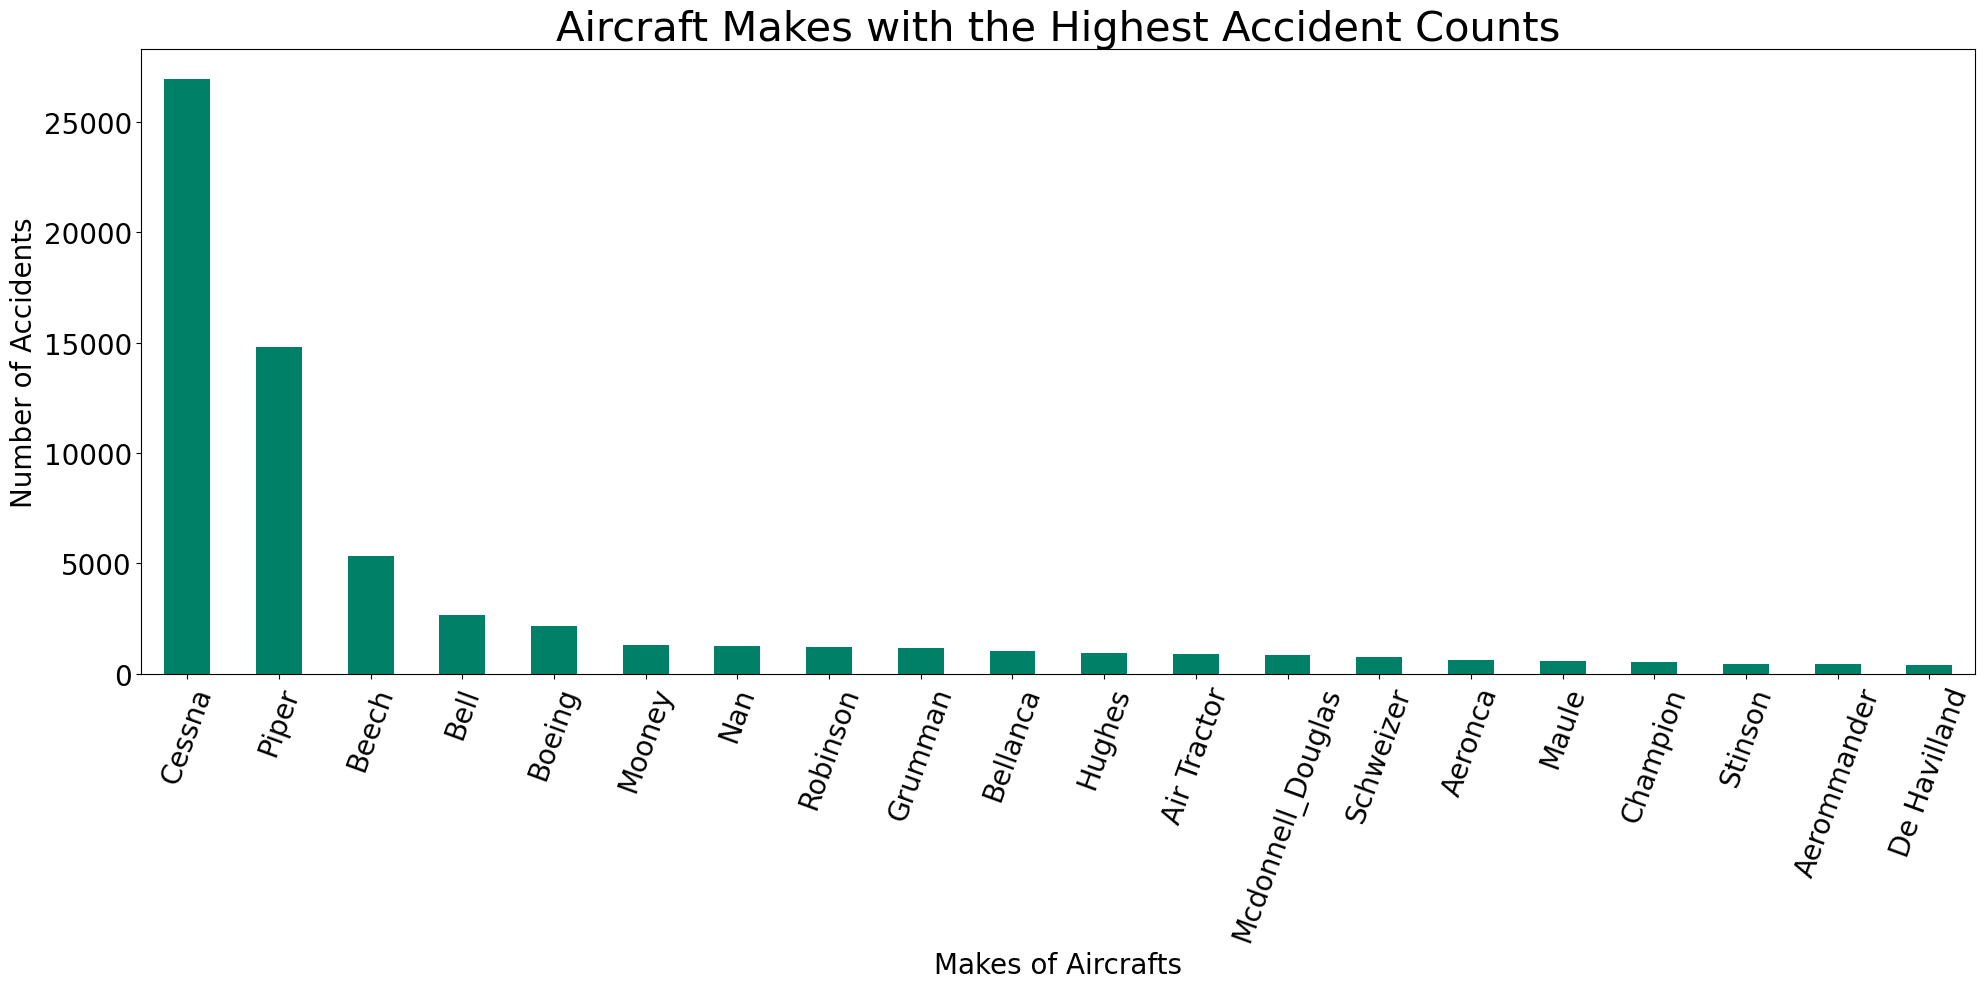

In [72]:
#plotting the top accident counts by aircraft make to make sure the recommended safest makes are not prone to accidents 
fig, ax = plt.subplots(figsize = (20,10))
df_major['Make'].value_counts().head(20).plot.bar(ax=ax,colormap='summer')
ax.set_title('Aircraft Makes with the Highest Accident Counts', fontsize = 30 )
ax.set_xlabel('Makes of Aircrafts', fontsize = 20)
ax.set_ylabel('Number of Accidents', fontsize = 20)
ax.tick_params(axis = 'x', rotation =70, labelsize=20)
ax.tick_params(axis = 'y', labelsize=20)
plt.tight_layout()
plt.show()

/Users/wesleydickens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/wesleydickens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


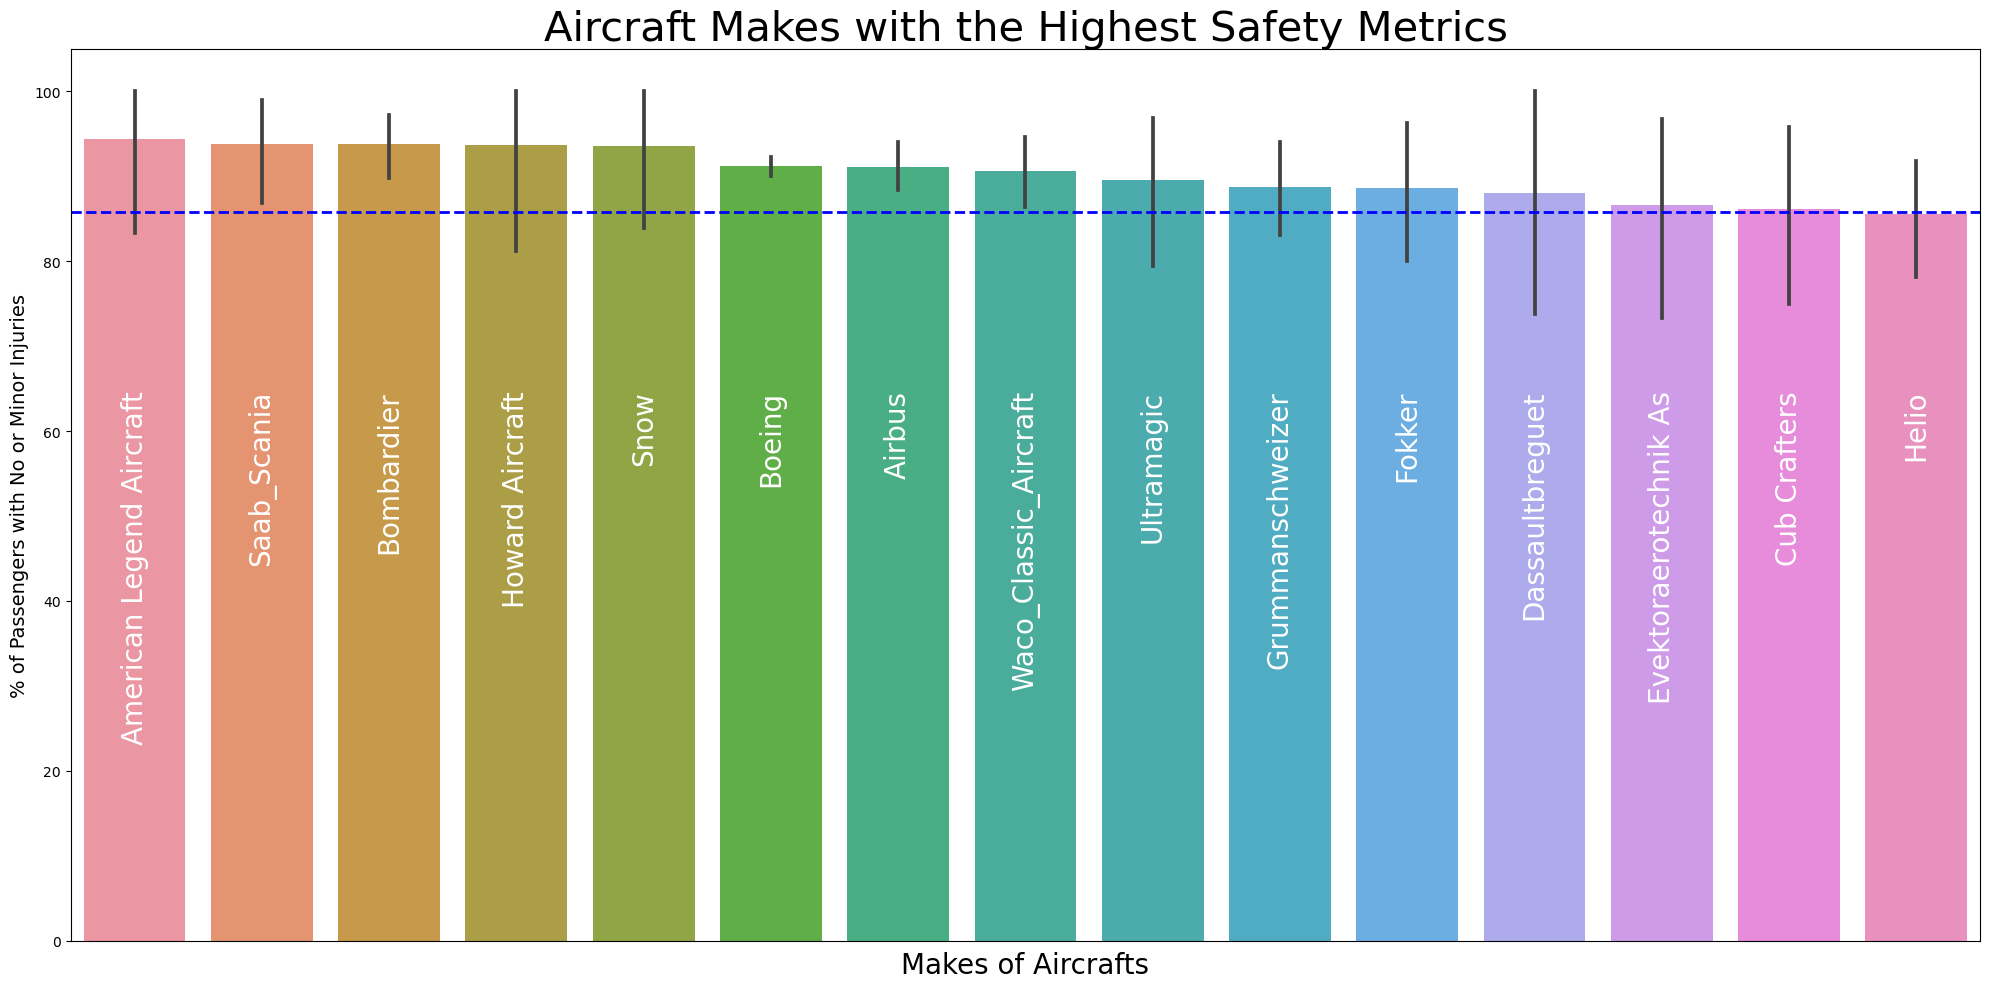

In [73]:
#plot to demonstrate the safest makes and their safety metrics
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(x='Make',y='Minor/NonInj_Percentage',data=df_safest,order=list(safest_makes))
ax.set_title('Aircraft Makes with the Highest Safety Metrics', fontsize = 30 )
ax.set_xlabel('Makes of Aircrafts', fontsize = 20)
ax.set_ylabel('% of Passengers with No or Minor Injuries', fontsize = 14)
ax.tick_params(axis = 'x', rotation = 90, pad = -400, labelsize=20,colors='white')
ax.axhline(y=85.797161, c ='b', linewidth = 2, linestyle = '--')
plt.tight_layout()
plt.show()


In [74]:
#ax.annotate('~85.8%', xy = ['Helio',85.797161], xytext = ['Helio',100],fontsize = 12, c = 'b', arrowprops = dict(arrowstyle='->', color='blue', linewidth=2))


/Users/wesleydickens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/wesleydickens/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/wesleydickens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/wesleydickens/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: Fut

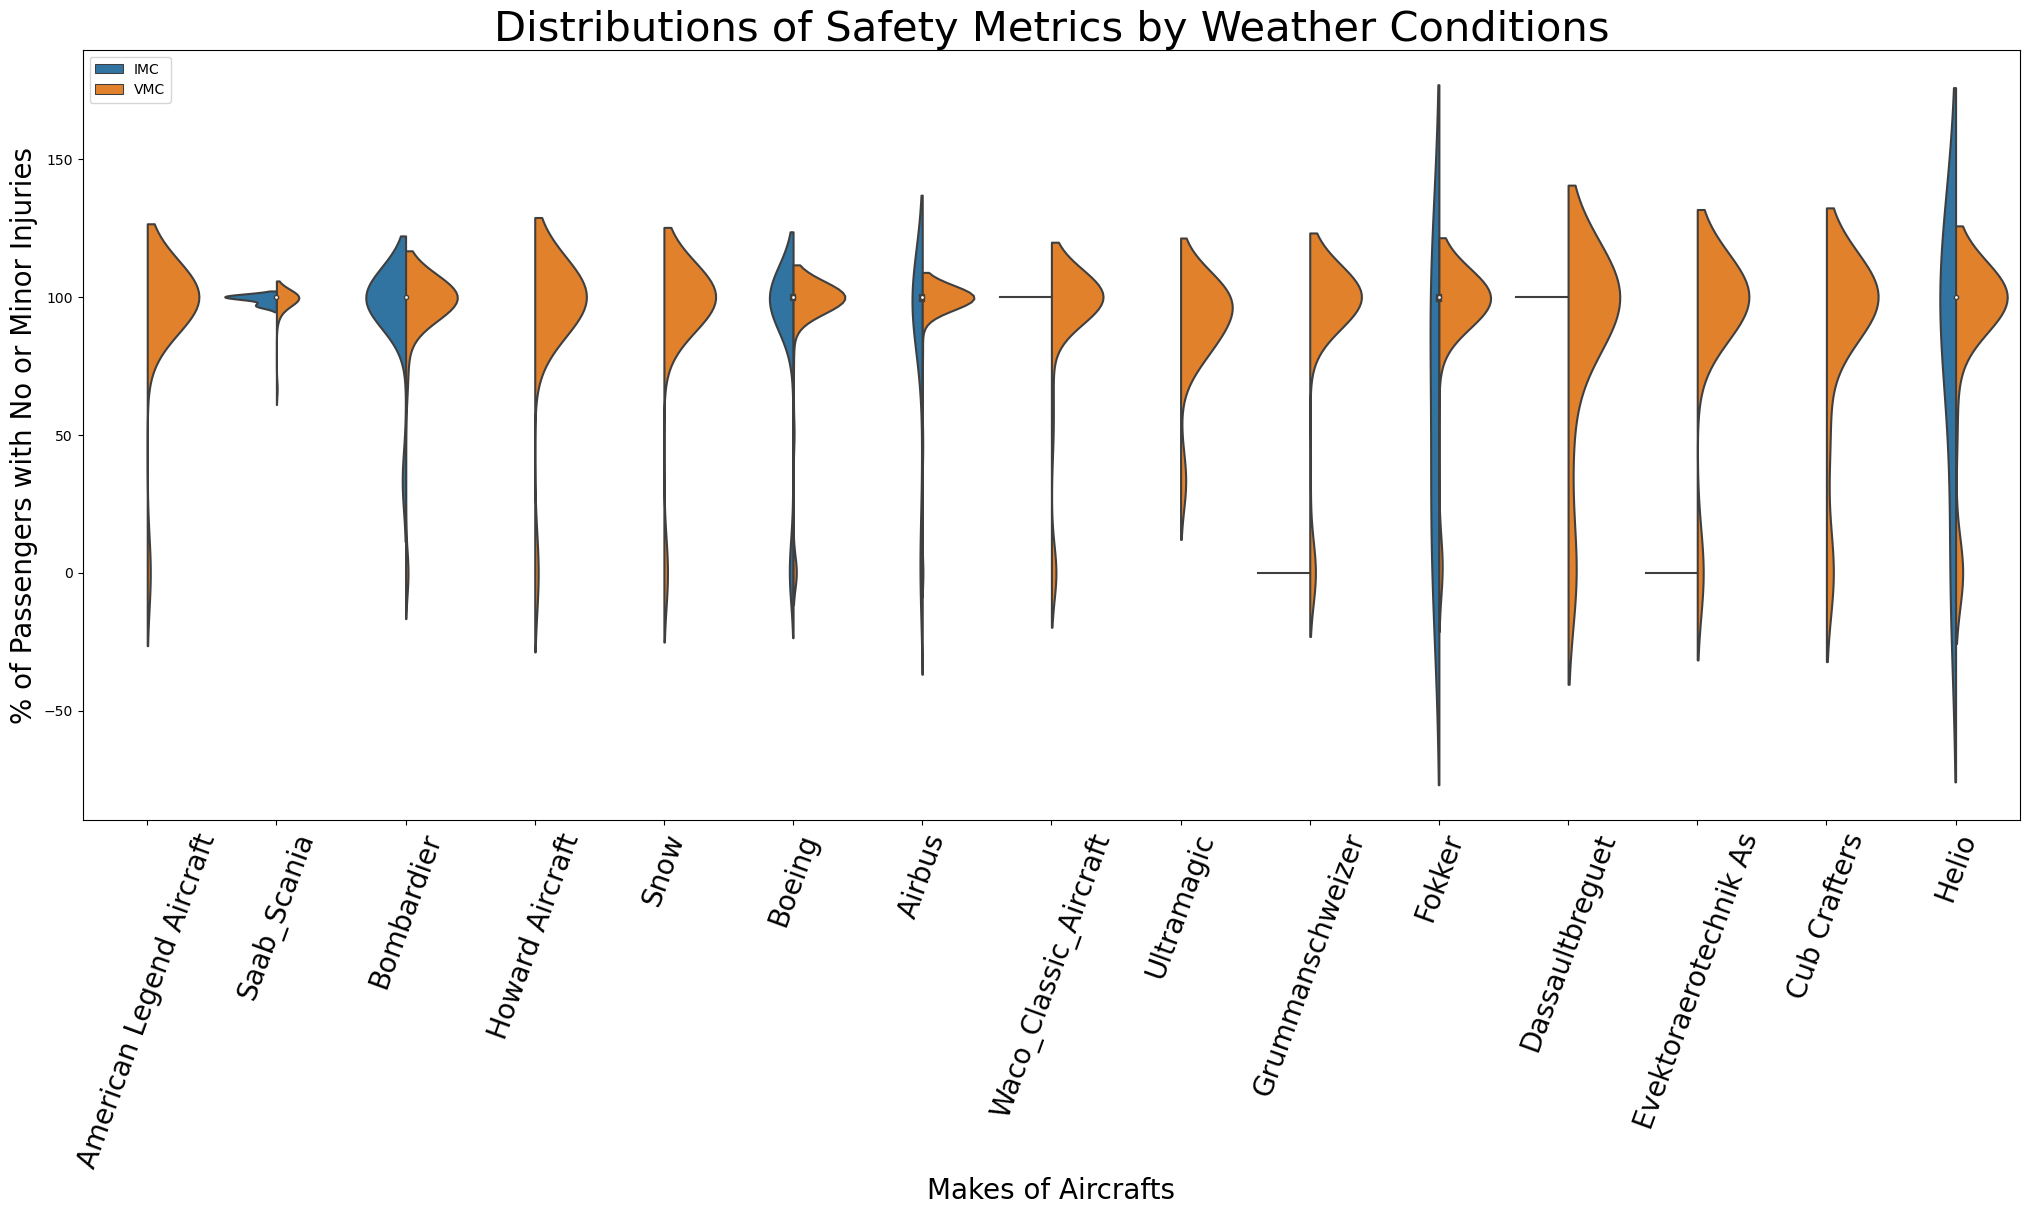

In [75]:
#plot to analyze the distribution of safety metric for the safest makes based on weather condition 
fig, ax = plt.subplots(figsize = (25,10))
sns.violinplot(x='Make',y='Minor/NonInj_Percentage',data = df_safest_makes,order=list(safest_makes),hue='Weather.Condition',split = True)
ax.set_title('Distributions of Safety Metrics by Weather Conditions', fontsize = 30 )
ax.set_xlabel('Makes of Aircrafts', fontsize = 20)
ax.set_ylabel('% of Passengers with No or Minor Injuries', fontsize = 20)
ax.tick_params(axis = 'x', rotation = 70, labelsize=20,colors='black')
ax.legend(loc = 'upper left')
plt.show()

In [76]:
#Used to inpsect makes with no IMC weather hue distributions to confirm they are not suitable for recommendation. 
#These are generally small makes that are more impacted by adverse weather conditions and therefore less versatile and profitable
df[df['Make']=='American Legend Aircraft']['Total_passengers'].describe()

count    18.000000
mean      1.444444
std       0.511310
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: Total_passengers, dtype: float64

In [77]:
# coming up with the list of recommended makes that are more weather resilient and predictable in safety metric (less dispersed in distribution)
recommended_makes=['Bombardier','Saab_Scania','Boeing']
#slicing the data set with recommeded makes for specific model recommendations
len(df[df['Make'].isin(recommended_makes)])

2324

In [78]:
#Coming up with specific recommended models with 100% minor or no injury rates that holds at least 10 passengers
grouped = df[df['Make'].isin(recommended_makes)].groupby('Make and Model')

df_subset_makenmodel_mean = grouped.apply(lambda x: x.select_dtypes(include=['float64']).mean())
df_recommended_makemodels=df_subset_makenmodel_mean[df_subset_makenmodel_mean['Minor/NonInj_Percentage']==100]
df_recommended_makenmodels=df_recommended_makemodels[df_recommended_makemodels['Total_passengers']>10]
recommended_makenmodels=list(df_recommended_makenmodels.index)
recommended_makenmodels

['Boeing-707123B',
 'Boeing-707355C',
 'Boeing-717 200',
 'Boeing-717231',
 'Boeing-720025',
 'Boeing-727023',
 'Boeing-727200A',
 'Boeing-727200B',
 'Boeing-72721',
 'Boeing-727214A',
 'Boeing-72722',
 'Boeing-727223B',
 'Boeing-72722C',
 'Boeing-72723',
 'Boeing-727231A',
 'Boeing-727233',
 'Boeing-727247',
 'Boeing-72725',
 'Boeing-727254',
 'Boeing-727257',
 'Boeing-727276',
 'Boeing-727290',
 'Boeing-7272M7',
 'Boeing-7272Q8',
 'Boeing-72731',
 'Boeing-72731H',
 'Boeing-72735',
 'Boeing-72751',
 'Boeing-72790C',
 'Boeing-737  3L9',
 'Boeing-737  4D7',
 'Boeing-737  53C',
 'Boeing-737  6Ct',
 'Boeing-737  800',
 'Boeing-737  8As',
 'Boeing-737  8K2',
 'Boeing-737  932Er',
 'Boeing-737 3H4',
 'Boeing-737 500',
 'Boeing-737 724',
 'Boeing-737 76N',
 'Boeing-737 76Q',
 'Boeing-737 7L9',
 'Boeing-737 800',
 'Boeing-737 832',
 'Boeing-737 924',
 'Boeing-737130',
 'Boeing-737200A',
 'Boeing-737200C',
 'Boeing-737200Rs',
 'Boeing-737205',
 'Boeing-737209',
 'Boeing-737217',
 'Boeing-73724

In [79]:
#Creating dataset filtered for recommended makes and models
df_recommended_makes=df[df['Make'].isin(recommended_makes)]
df_recommended_makenmodels=df[df['Make and Model'].isin(recommended_makenmodels)]

In [80]:
#Outputting recommedations as csvs
df_recommended_makenmodels.to_csv('AviationDataCleaned_RecommendedModel.csv')
df_recommended_makes.to_csv('AviationDataCleaned_RecommendedMakes.csv')

### Regional Analysis

In [81]:
# Bring in CSV that Sunny's notebook outputs
df = pd.read_csv('AviationDataCleaned_RecommendedMakes.csv',index_col=0)

# Display charts inline for easy reading
%matplotlib inline

#### Rename an unnamed column that was breaking Tableau import later on

In [82]:
df.rename(columns={"Unnamed: 0":"F1"},inplace=True)

#### Create a subset of the DF that has only US accidents

In [83]:
df_us = df[df['Country'] == 'United States']
df_us.reset_index(drop=True, inplace=True)

# Create a copy of the DF so I don't destroy the original on accident downstream
df_us = df_us.copy()

### Create City, State, and Region columns based on the Location column 

* First we need a list of valid state codes to verify that the location has a valid US states
* Next we'll create a state-region map that will assign a region to the corresponding State


In [84]:
states = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

state_region_map = {
    'ME': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast', 'MA': 'Northeast',
    'RI': 'Northeast', 'CT': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast', 'NJ': 'Northeast',
    'WI': 'Midwest', 'MI': 'Midwest', 'IL': 'Midwest', 'IN': 'Midwest', 'OH': 'Midwest',
    'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest',
    'DE': 'South', 'MD': 'South', 'DC': 'South', 'VA': 'South', 'WV': 'South', 'NC': 'South', 'SC': 'South', 
    'GA': 'South', 'FL': 'South', 'KY': 'South', 'TN': 'South', 'MS': 'South', 'AL': 'South', 'OK': 'South', 
    'TX': 'South', 'AR': 'South', 'LA': 'South',
    'ID': 'West', 'MT': 'West', 'WY': 'West', 'NV': 'West', 'UT': 'West', 'CO': 'West', 'AZ': 'West', 
    'NM': 'West', 'AK': 'West', 'WA': 'West', 'OR': 'West', 'CA': 'West', 'HI': 'West'
}

def city_state(location):
    if pd.notna(location):
        location = location.strip()
        state = location[-2:].upper()
        city = location[:-4].strip().title()
        if state in states:
            return city, state
        else:
            return location, "No State"
    else:
        return np.nan, np.nan

df_us[['City', 'State']] = df_us['Location'].apply(city_state).apply(pd.Series)

df_us['Region'] = df_us['State'].apply(lambda x: state_region_map.get(x))

<i> The next 3 cells were an initial analysis to verify whether this was worth exploring in Tableau  </i>

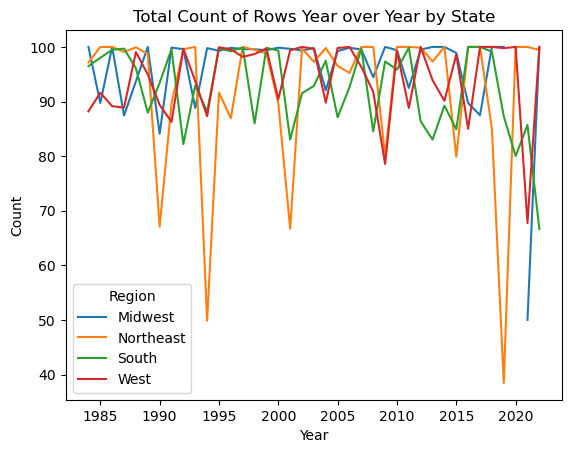

In [85]:
df_us = df_us[(df_us['State'] != 'No State') & (df_us['Year']>=1984)]

# Average Minor Injury % by Year & Region
grouped_data = df_us.groupby(['Year', 'Region'])['Minor/NonInj_Percentage'].mean().reset_index(name='Count')

pivot_data = grouped_data.pivot(index='Year', columns='Region', values='Count')

pivot_data.plot(kind='line')  # Use 'bar' for bar plot
plt.title('Total Count of Rows Year over Year by State')
plt.xlabel('Year')
plt.ylabel('Count')

plt.show()


In [86]:
col_selector = ['Region', 'Minor/NonInj_Percentage', 'Serious_Inj_Percentage', 'Fatality_Pecentage']
total_new = df_us[col_selector].groupby('Region').mean()
# total_new['Total'] = totals

total_new

,Minor/NonInj_Percentage,Serious_Inj_Percentage,Fatality_Pecentage
Region,,,
Midwest,95.875221,3.038959,1.085820
Northeast,92.365075,2.566937,5.067988
South,93.347611,4.084217,2.568172
West,94.007775,3.169521,2.822703


/Users/wesleydickens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/wesleydickens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/wesleydickens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/wesleydickens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

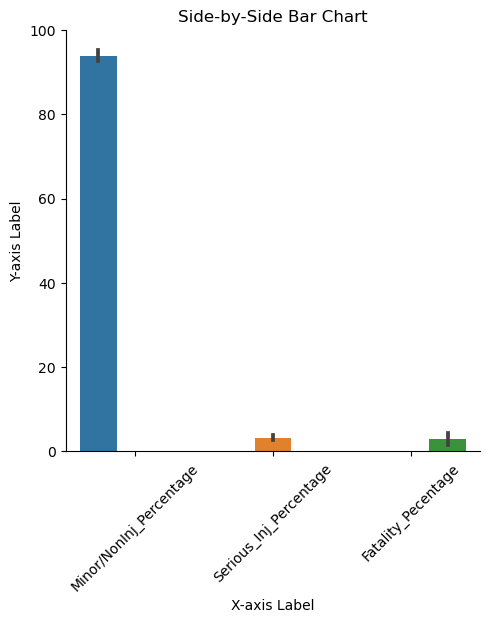

In [87]:
melted_df = total_new.melt(var_name='Category', value_name='Value')

melted_df = total_new.melt(var_name='Category', value_name='Value')

# Create a bar plot with catplot
sns.catplot(x='Category', y='Value', hue='Category', data=melted_df, kind='bar')

# Adding labels and title
plt.xlabel('X-axis Label')
plt.xticks(rotation=45)
plt.ylabel('Y-axis Label')
plt.title('Side-by-Side Bar Chart')

# Display the plot

plt.show()

<BarContainer object of 4 artists>

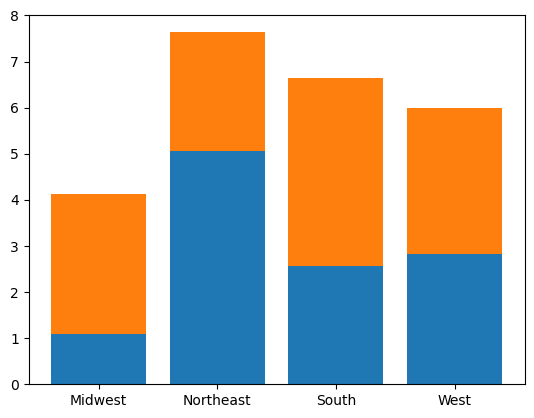

In [88]:
plt.bar(total_new.index, total_new['Fatality_Pecentage'])

plt.bar(total_new.index, total_new['Serious_Inj_Percentage'], label='Serious Injury Percentage', bottom=total_new['Fatality_Pecentage'])

### Export this finalized CSV to upload to Tableau 

In [89]:
df_us.to_csv('US_Accidents.csv')

## Pricing Analysis

In [90]:
price_df = pd.read_csv('Price_df.csv',low_memory=False)
price_df

,Model,Passengers,Price
0,Boeing-717231,128,5640000
1,Boeing-720025,210,7500000
2,Boeing-747 series,60,24000000
3,Boeing-757 series,393,418000000
4,Boeing-767 series,47,11270000
5,Boeing-B727 series,214,220000000
6,Boeing-B747,60,24000000
7,Boeing-B757,393,418000000
8,Boeing-B777,47,11270000
9,Boeing-B777,90,279000000


In [91]:
price_df_clean = price_df[price_df['Passengers'] != 0]
price_df_clean


,Model,Passengers,Price
0,Boeing-717231,128,5640000
1,Boeing-720025,210,7500000
2,Boeing-747 series,60,24000000
3,Boeing-757 series,393,418000000
4,Boeing-767 series,47,11270000
5,Boeing-B727 series,214,220000000
6,Boeing-B747,60,24000000
7,Boeing-B757,393,418000000
8,Boeing-B777,47,11270000
9,Boeing-B777,90,279000000


In [92]:
ppp = (price_df_clean['Price'] / price_df_clean['Passengers'])
pd.options.display.float_format = '{:.0f}'.format


#ppp_clean = []

#for value in ppp:
#    new = '{:.20f}'.format(value)
#    ppp_clean.append(new)
    
price_df_clean['Price Per Passenger'] = ppp
#price_df_clean['Price Per Passenger'] = price_df_clean['Price Per Passenger'].astype(int)
price_df_clean['Price Per Passenger'].astype('category')
price_df_clean['Passengers'].astype('category')
price_df_clean

price_df_clean_top = price_df_clean[price_df_clean['Price Per Passenger'] <= 200000]


price_df_clean_bottom = price_df_clean[price_df_clean['Price Per Passenger'] >= 400000]

best_high = price_df_clean[price_df_clean['Passengers'] >= 100]
best_high = best_high[best_high['Price Per Passenger'] <= 400000]

best_mid = (price_df_clean[price_df_clean['Passengers'] <= 100]) 
best_mid = best_mid[best_mid['Passengers'] >= 50]
best_mid = best_mid[best_mid['Price Per Passenger'] <= 100000000]


best_low = price_df_clean[price_df_clean['Passengers'] <= 50]
best_low = best_low[best_low['Price Per Passenger'] <= 100000000]

best_mid

,Model,Passengers,Price,Price Per Passenger
2,Boeing-747 series,60,24000000,400000
6,Boeing-B747,60,24000000,400000
9,Boeing-B777,90,279000000,3100000
10,Boeing-Dc982,90,279000000,3100000
17,Bombardier-Dhc 8,50,10000000,200000
22,Boeing-B744,90,279000000,3100000


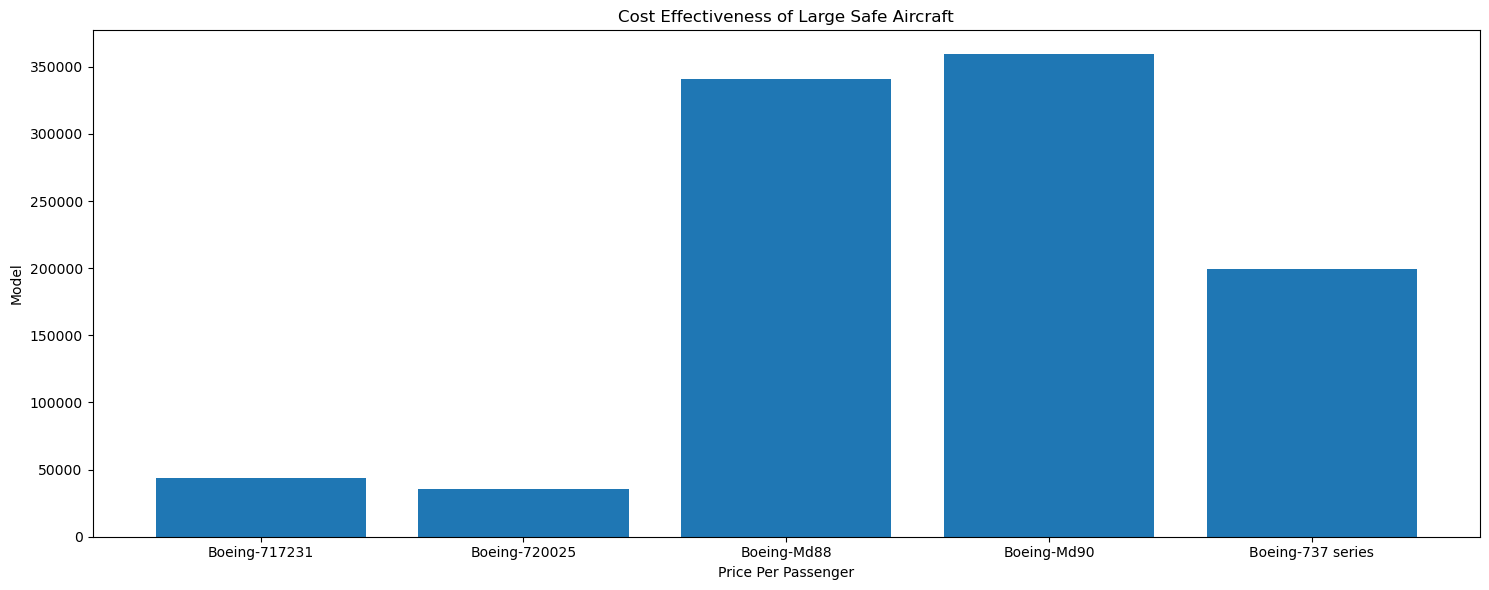

In [93]:
title = 'Cost Effectiveness of Large Safe Aircraft'
Model_Label = 'Model'
PPP_label = 'Price Per Passenger'

tackle_figure, ax = plt.subplots(figsize=(15, 6))

Model = best_high['Model']
PPP = best_high['Price Per Passenger']

ax.bar(Model,PPP)
ax.set_xlabel(PPP_label)
ax.set_ylabel(Model_Label)
ax.set_title(title)


plt.tight_layout()
plt.show()

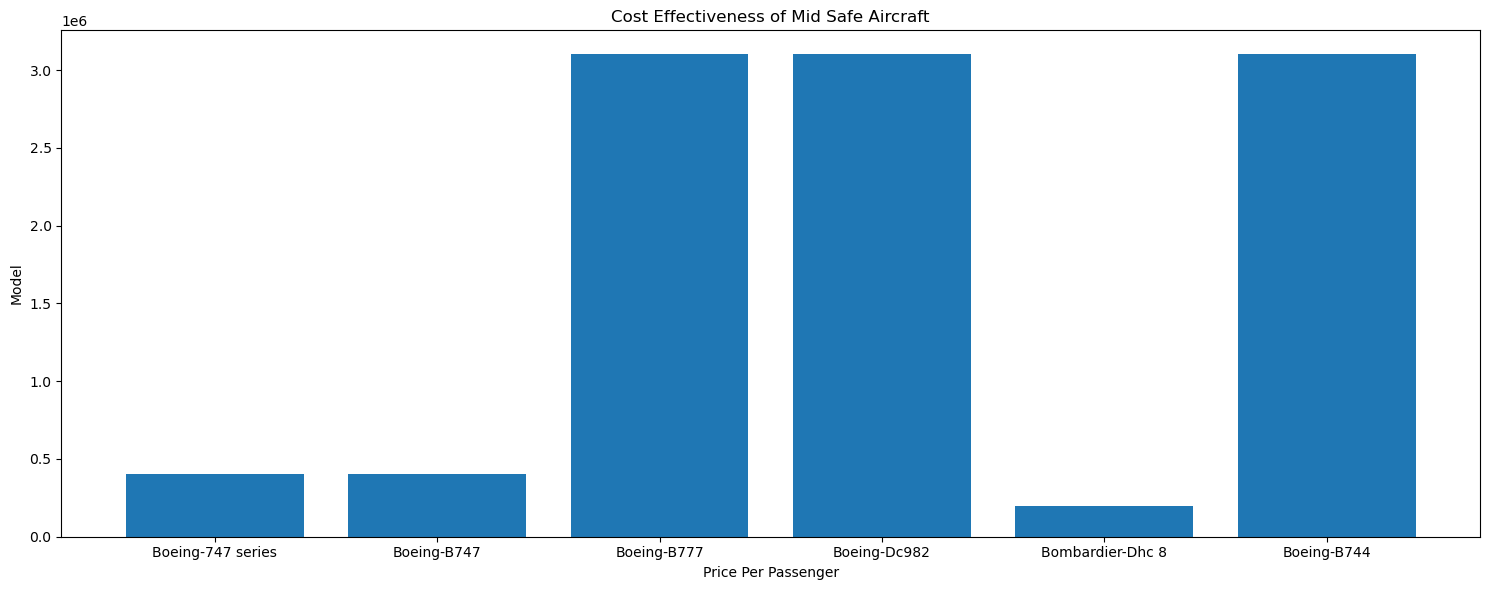

In [94]:
title = 'Cost Effectiveness of Mid Safe Aircraft'
Model_Label = 'Model'
PPP_label = 'Price Per Passenger'

Plane_figure, ax = plt.subplots(figsize=(15, 6))

Model = best_mid['Model']
PPP = best_mid['Price Per Passenger']

ax.bar(Model,PPP)
ax.set_xlabel(PPP_label)
ax.set_ylabel(Model_Label)
ax.set_title(title)


plt.tight_layout()
plt.show()

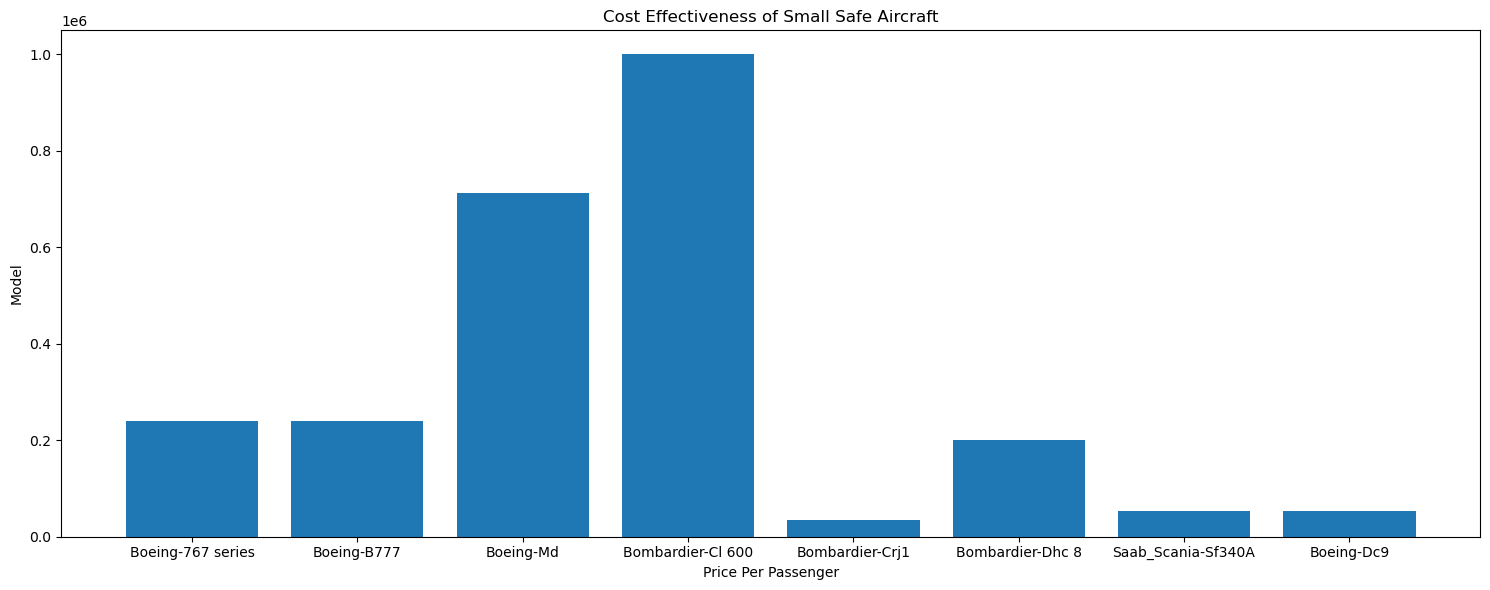

In [95]:
title = 'Cost Effectiveness of Small Safe Aircraft'
Model_Label = 'Model'
PPP_label = 'Price Per Passenger'

tackle_figure, ax = plt.subplots(figsize=(15, 6))

Model = best_low['Model']
PPP = best_low['Price Per Passenger']

ax.bar(Model,PPP)
ax.set_xlabel(PPP_label)
ax.set_ylabel(Model_Label)
ax.set_title(title)


plt.tight_layout()
plt.show()